In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils.config import OUTPUT_FILES_PATHS

score_columns = ["lida_score", "draco_cost", "final_score"]

def visualize_draco_vs_lida(df):
    plt.figure(figsize=(10,6))
    sns.scatterplot(
        data=df,
        x="draco_cost",
        y="lida_score",
        hue="llm_selected",
        palette={True: "red", False: "blue"}, 
        legend="full"
    )
    plt.title("Draco Cost vs. Lida Score")
    plt.xlabel("Draco Cost")
    plt.ylabel("Lida Score")
    plt.legend(title="LLM Selected")
    
    plt.show()


def visualize_scores_for_column_pairs(df, score_column):
    if score_column == "draco_cost":
        df_sorted = df.sort_values(f"{score_column}", ascending=True).reset_index(drop=True)
    
    elif score_column == "lida_score" or score_column == "final_score":
        df_sorted = df.sort_values(f"{score_column}", ascending=False).reset_index(drop=True)
    
    else:
        raise ValueError("Unsupported column")
    
    plt.figure(figsize=(12,6))
    bars = plt.bar(df_sorted["pair_name"], df_sorted[f"{score_column}"], color="gray")
    
    for i, row in df_sorted.iterrows():
        if row["llm_selected"]:
            bars[i].set_color("red")
    
    plt.title(f"Pairs Ranked by {score_column}")
    plt.xlabel("Column Pairs")
    plt.ylabel(f"{score_column}")
    plt.xticks(rotation=90)  
    
    plt.tight_layout()
    plt.show()

In [2]:
data_frames = []
for file_path in OUTPUT_FILES_PATHS:
    df = pd.read_csv(file_path)
    df["pair_name"] = df["col1"] + "_" + df["col2"]
    data_frames.append(df)

Draco Cost vs Lida Score
Top 1 chart


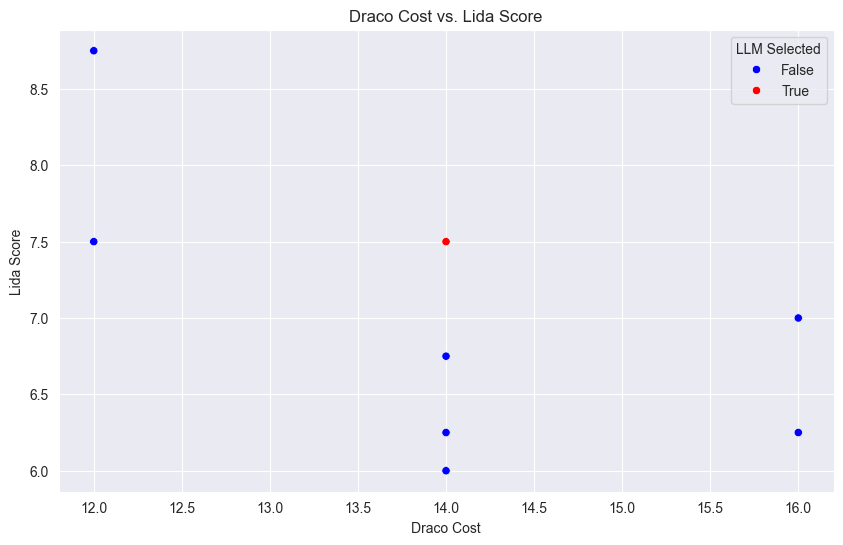

Top 3 charts


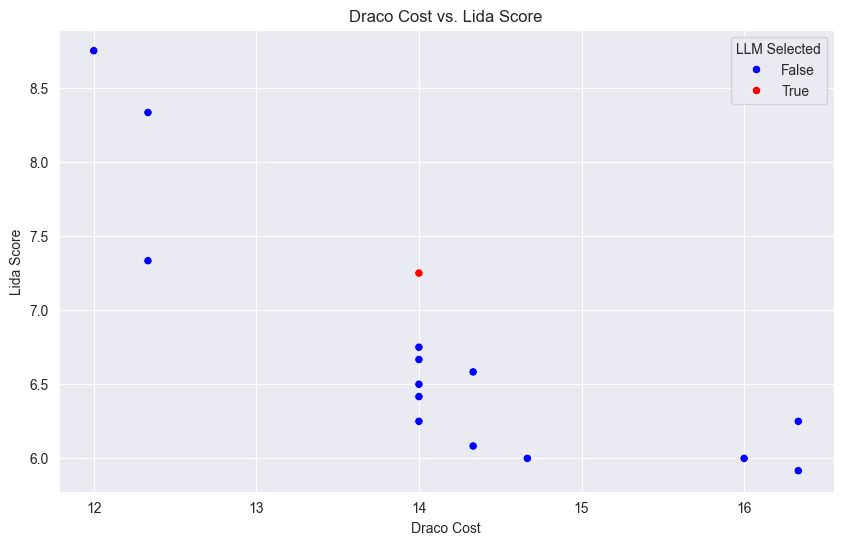

Top 5 charts


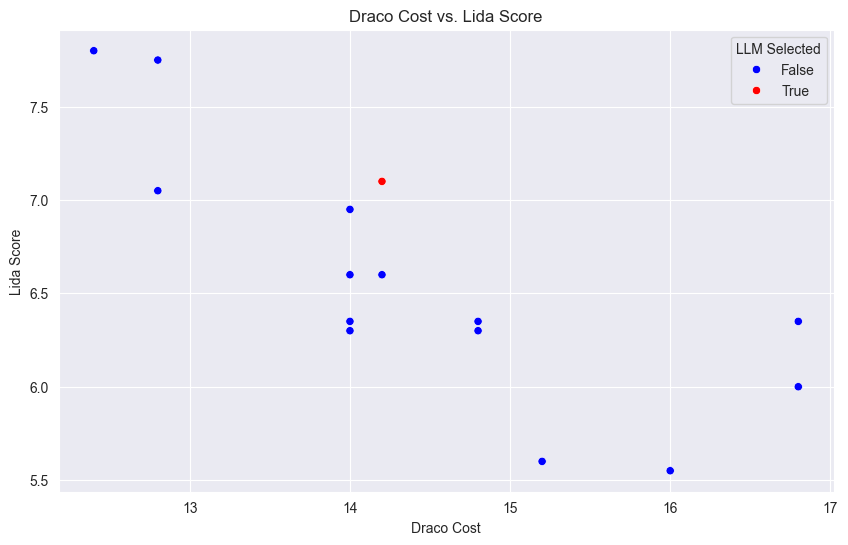

In [3]:
print("Draco Cost vs Lida Score")
chart_labels = ['Top 1 chart', 'Top 3 charts', 'Top 5 charts']
for df, chart_label in zip(data_frames, chart_labels):
    print(chart_label)
    visualize_draco_vs_lida(df)

Visualizations for all column pairs ranked using all evaluation scores
Top 1 chart


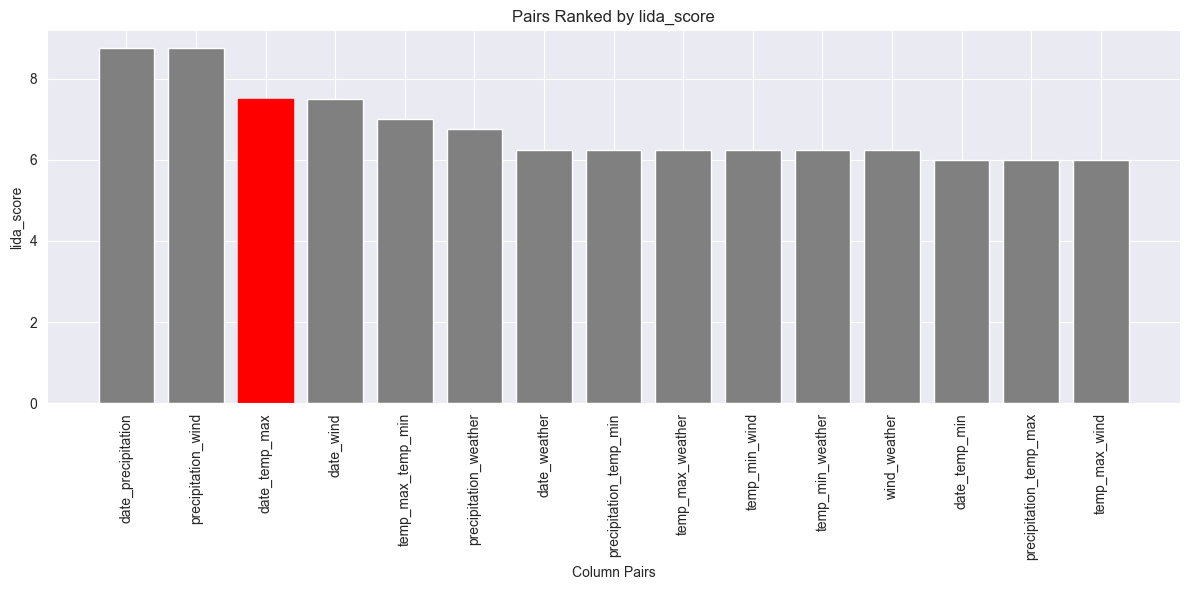

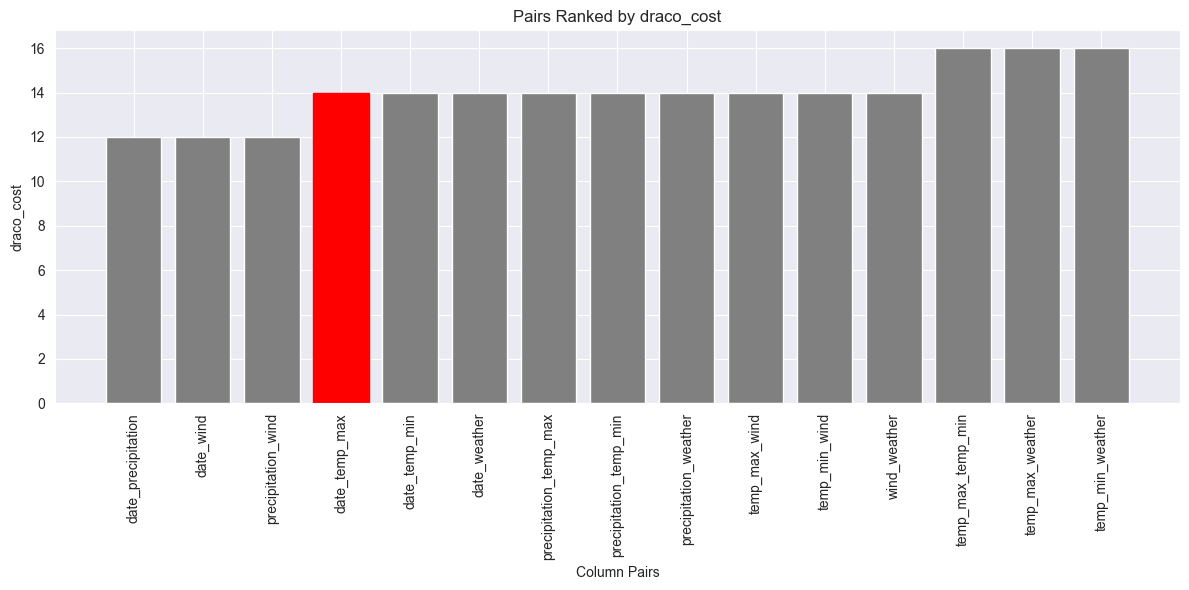

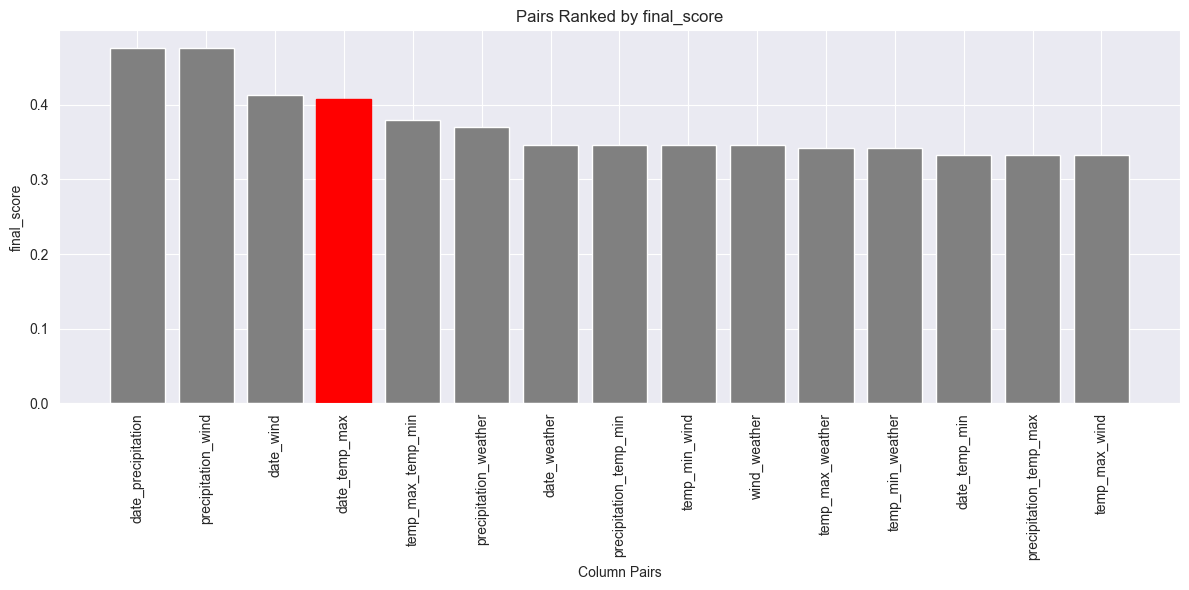

Top 3 charts


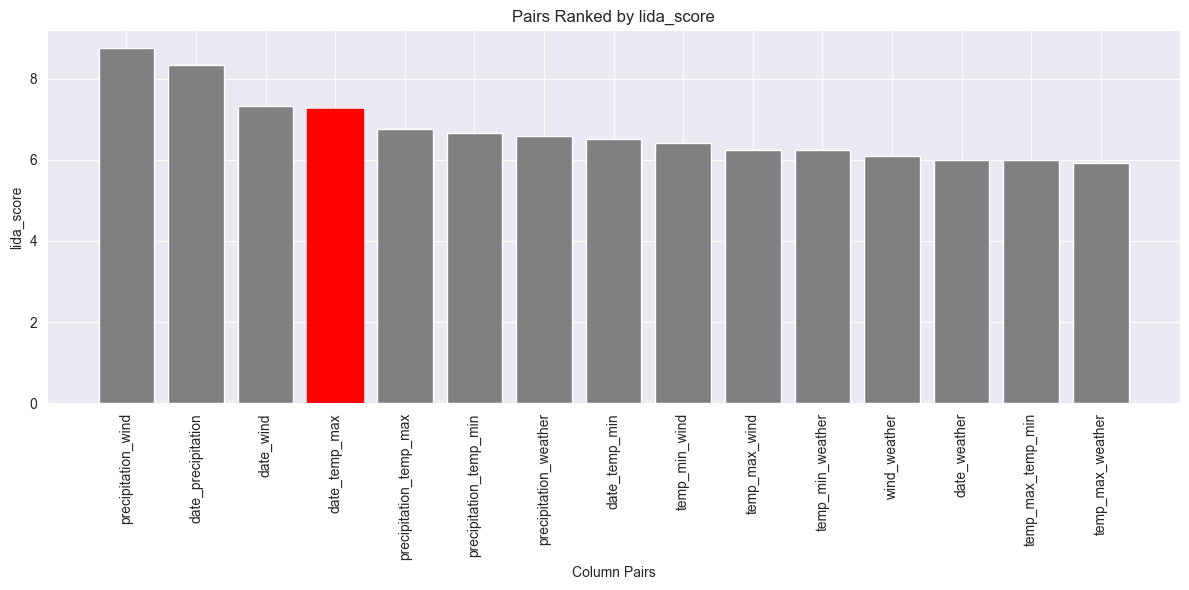

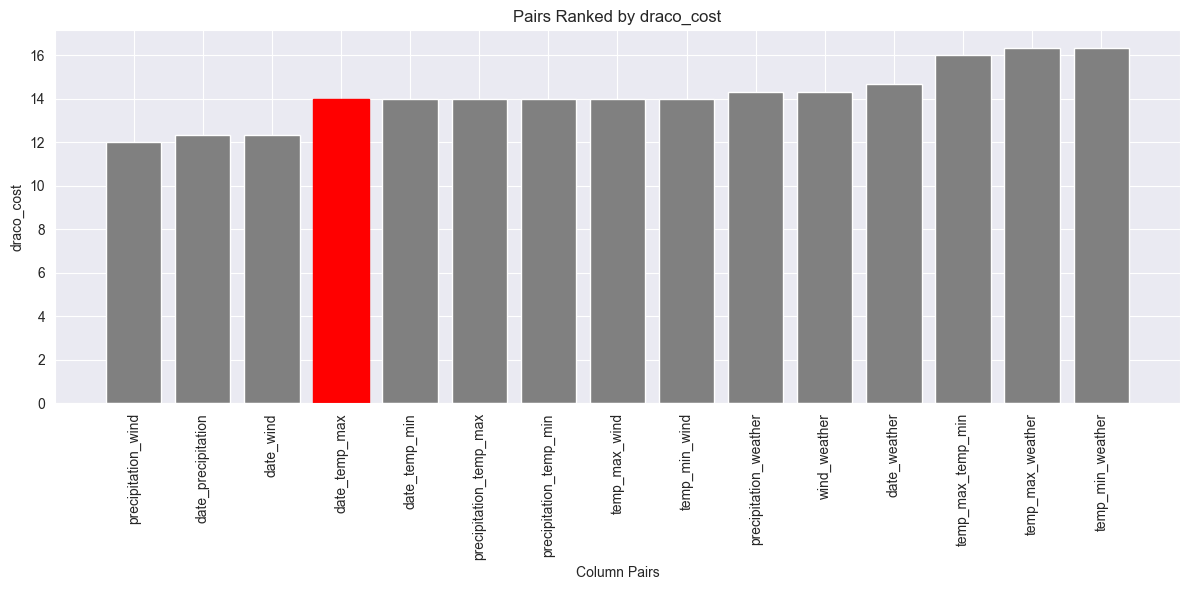

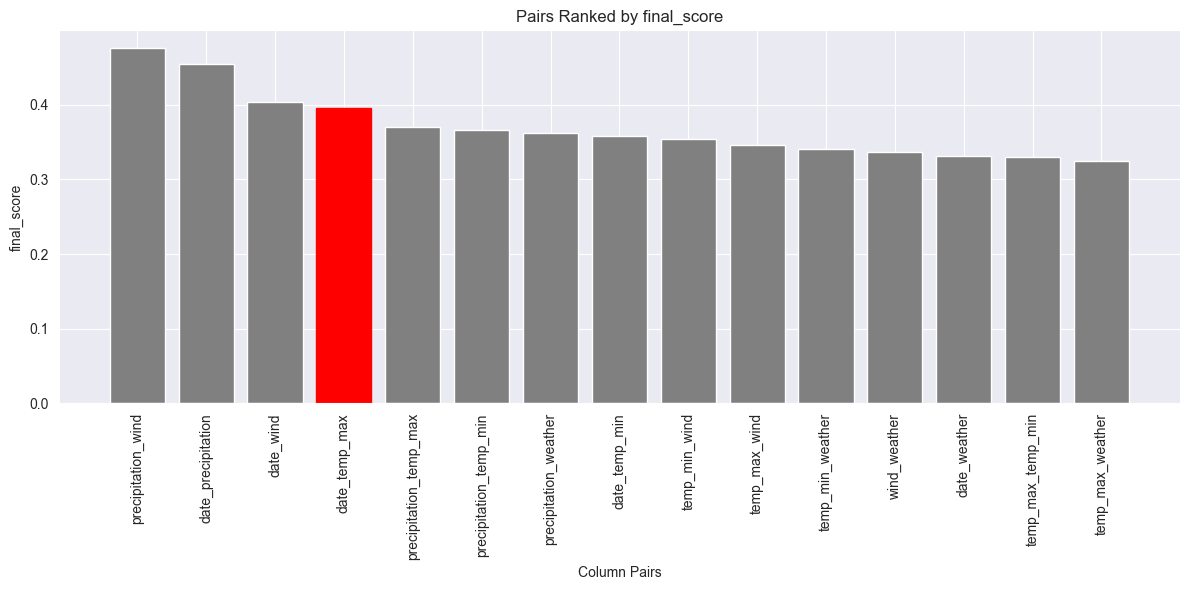

Top 5 charts


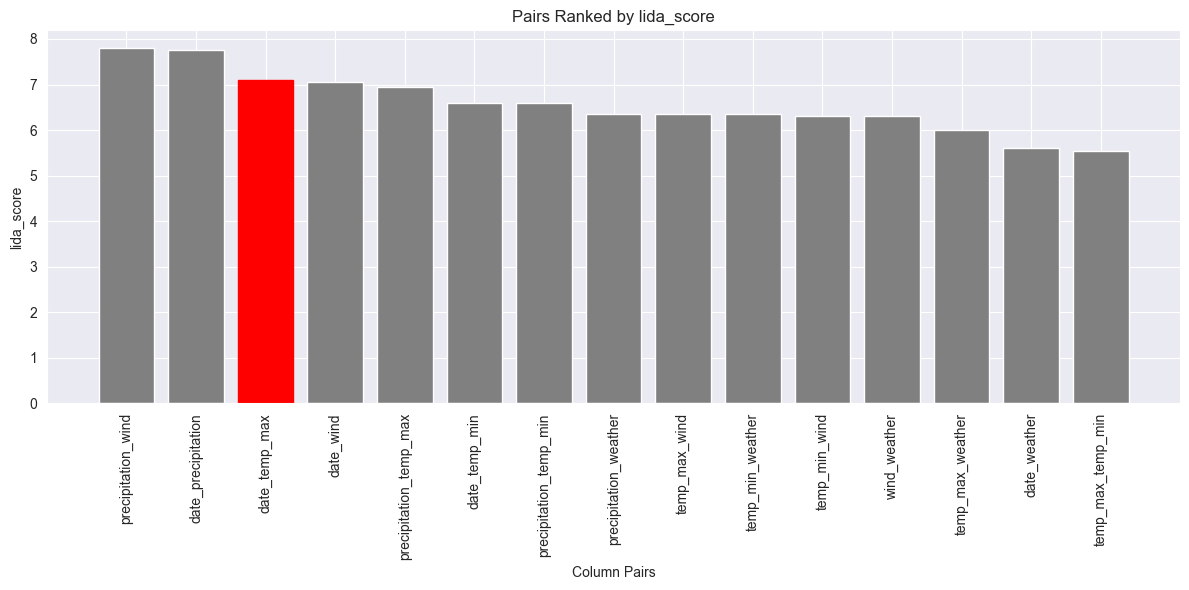

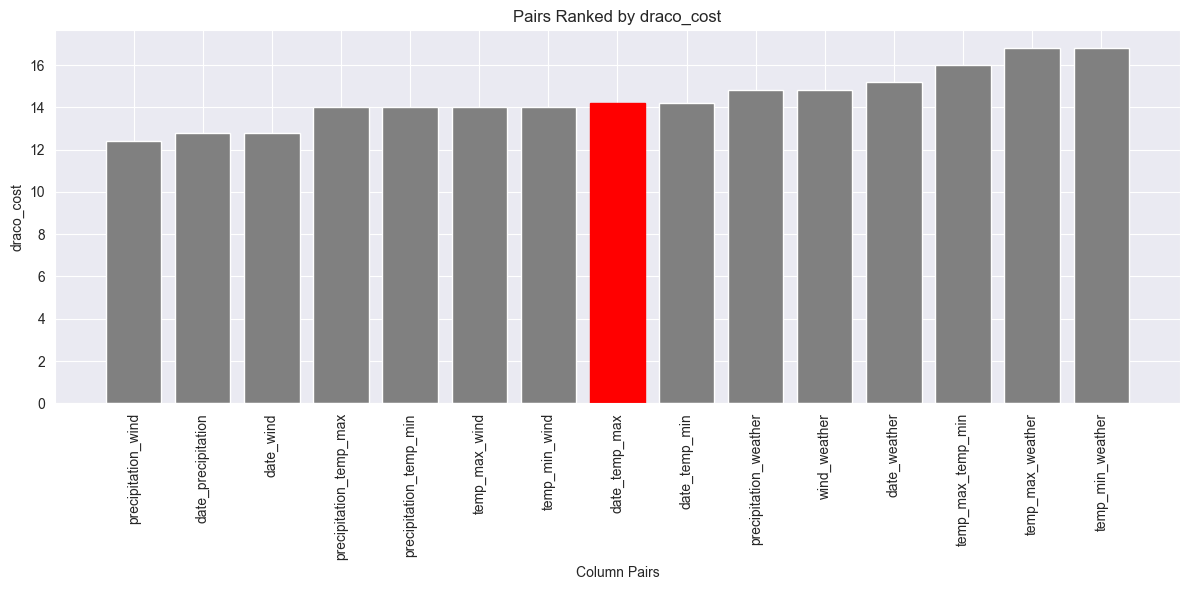

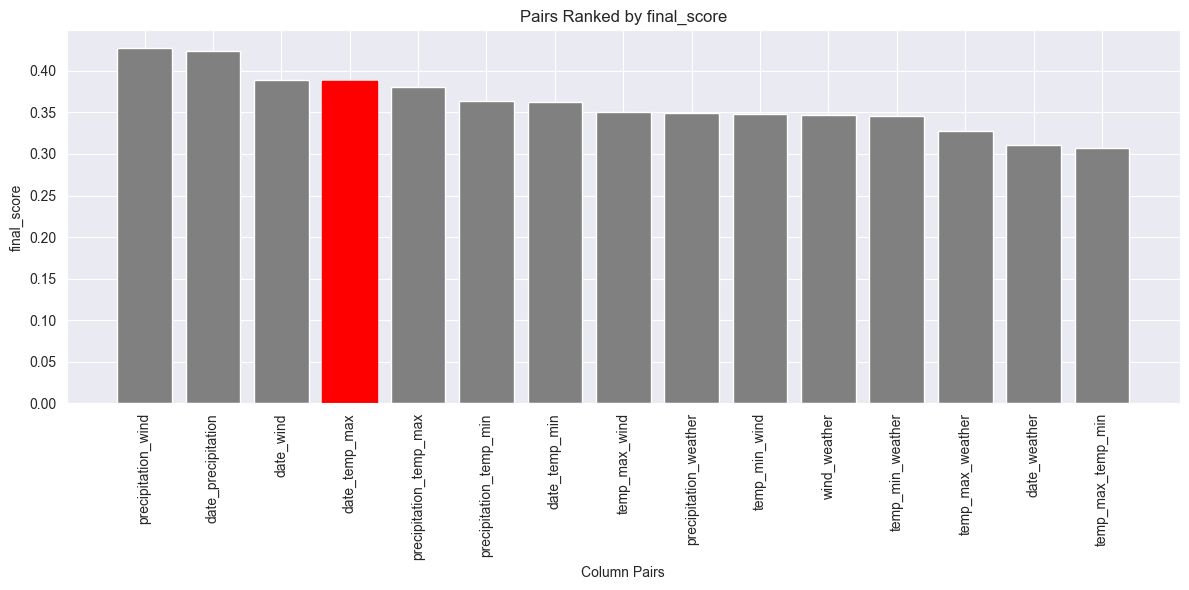

In [4]:
print('Visualizations for all column pairs ranked using all evaluation scores')
for df, chart_label in zip(data_frames, chart_labels):
    print(chart_label)
    for score_column in score_columns:
        visualize_scores_for_column_pairs(df, score_column)